In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
df = pd.read_csv("College_Data.csv")

In [3]:
# Display first few rows
print(df.head())

   College ID      Country  Total Students   Male  Female       CGPA  \
0  College 52           UK           27002   2593   11644  10.000000   
1  College 93  Switzerland           11913   9392    2521   6.951278   
2  College 15        Japan           15644   5475    4388   9.327922   
3  College 72    Singapore           13239   7363    5876   8.681112   
4  College 61       Canada           10236  13339   -3103   8.560567   

   Annual Family Income                   Branch      Sports  \
0               3574250                  Physics    Swimming   
1                762556     Chemical Engineering   Athletics   
2               1795845  Business Administration  Volleyball   
3               1222223                  Physics      Tennis   
4               1921133            Biotechnology   Athletics   

   Research Papers Published  Placement Rate  Faculty Count  
0                         39          100.00            655  
1                         31           68.84            25

In [4]:
# Drop non-numeric columns
df = df.drop(columns=['College ID', 'Country', 'Branch'])

In [5]:
# Handle categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [7]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
K = range(1, 11)  # Checking for clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

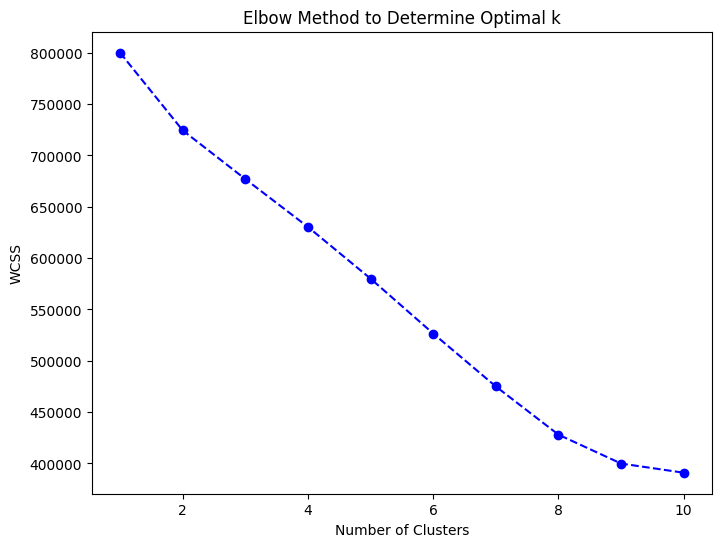

In [8]:
# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [9]:
# Choose optimal k (based on elbow point)
k_optimal = 3  # Adjust based on the elbow plot

In [10]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [13]:
# Display cluster counts
print(df['Cluster'].value_counts())

Cluster
2    25479
1    18914
0     5607
Name: count, dtype: int64
